In [16]:
from initial_exploration_ross import *
import numpy as np
import sympy as sp

In [74]:

##############
### Script ###
##############

convert_rotating_inertial_frame_test()

### Variables

mu = 0.0121

xL1, xL2, xL3, (xL4, yL4), (xL5, yL5) = find_lagrange_points(mu)
u1, u2, u, v = get_eigenbasis_vectors(xL1, mu)

# displacements = [0, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
displacements = np.linspace(-1e-4, 1e-4, 10)
# displacements = [1e-2]
init_cond = np.array([xL1, 0.0, 0.0, 0.0, -0.3, 0.0])
# displacements = [1e-4]#, 1e-4]#, 1e-3, 1e-2]
# displacements = [0.0]
form_init_cond = np.vstack([init_cond + disp * np.array([1, 0, 0, 0, 0, 0]) for disp in displacements]).T
# form_init_cond = np.repeat(init_cond, len(displacements)).reshape(len(init_cond), -1)
# for it, disp in enumerate(displacements):
#     form_init_cond[[0, 1, 3, 4], it] += disp * u
# form_init_cond = init_cond.T.tolist()
conj_mom = False
# H_old = get_cr3bp_hamiltonian(mu, state=init_cond, conj_mom=conj_mom)
H = get_cr3bp_hamiltonian(conj_mom=conj_mom)
ta = get_ta(H, form_init_cond.tolist(), batch_mode=True, conj_mom=conj_mom)
ta.set_time(0.0)
ta.pars[0] = mu
#ta.pars[0] = mu
nsteps = 2000
t_final = 2 * np.pi
# t_final = 200
epochs = np.repeat(np.linspace(0, t_final, nsteps), len(displacements)).reshape(
    nsteps, -1
)

E = [get_cr3bp_hamiltonian(mu, state=ic, conj_mom=conj_mom) for ic in form_init_cond.T]
E_ic = get_cr3bp_hamiltonian(mu, state=init_cond, conj_mom=conj_mom)

# 1. the outcome of the integration,
# 2. the minimum and maximum integration timesteps
# 3. that were used in the propagation,
# 4. the total number of steps that were # taken.
# 5. The fifth value returned by propagate_grid() is the step callback, if provided
# by the user (see below). Otherwise, None is returned.
# 6. The sixth value returned by propagate_grid() is a 2D array containing the
# state of the system at the time points in the grid:
_, out = ta.propagate_grid(epochs)

# def check_energy_consistency(states):
    # for i in states

# check_energy_consistency(out[5])

m1_pos = np.array([-mu, 0, 0])
m2_pos = np.array([1 - mu, 0, 0])
L1_pos = np.array([xL1, 0, 0])
L2_pos = np.array([xL2, 0, 0])
L3_pos = np.array([xL3, 0, 0])
L4_pos = np.array([xL4, yL4, 0])
L5_pos = np.array([xL5, yL5, 0])


m1_in_pos = convert_rotating_to_inertial_frame(m1_pos, epochs[:, 0])
m2_in_pos = convert_rotating_to_inertial_frame(m2_pos, epochs[:, 0])
L1_in_pos = convert_rotating_to_inertial_frame(L1_pos, epochs[:, 0])
L2_in_pos = convert_rotating_to_inertial_frame(L2_pos, epochs[:, 0])
L3_in_pos = convert_rotating_to_inertial_frame(L3_pos, epochs[:, 0])
L4_in_pos = convert_rotating_to_inertial_frame(L4_pos, epochs[:, 0])
L5_in_pos = convert_rotating_to_inertial_frame(L5_pos, epochs[:, 0])

# Find the forbidden region
xx = np.linspace(-1.5, 1.5, 2000)
yy = np.linspace(-1.5, 1.5, 2000)
x_grid, y_grid = np.meshgrid(xx, yy)
symbs = ["x", "y", "z", "xdot", "ydot", "zdot"]
potentials = get_u_bar(mu, (x_grid, y_grid, np.zeros(np.shape(x_grid))))


In [75]:
import matplotlib.pyplot as plt
def get_cycle(cmap, N=None, use_index="auto"):
    if isinstance(cmap, str):
        if use_index == "auto":
            if cmap in ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']:
                use_index=True
            else:
                use_index=False
        cmap = plt.get_cmap(cmap)
    if not N:
        N = cmap.N
    if use_index=="auto":
        if cmap.N > 100:
            use_index=False
        elif isinstance(cmap, LinearSegmentedColormap):
            use_index=False
        elif isinstance(cmap, ListedColormap):
            use_index=True
    if use_index:
        ind = np.arange(int(N)) % cmap.N
        return plt.cycler("color",cmap(ind))
    else:
        colors = cmap(np.linspace(0,1,N))
        return plt.cycler("color",colors)

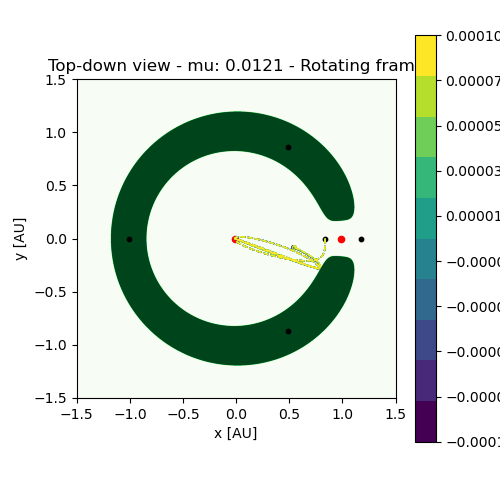

In [76]:

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mcolors
%matplotlib widget

fig = plt.figure(figsize=(5, 5))


### Plot 1 ###

norm = mcolors.Normalize(vmin=min(displacements), vmax=max(displacements))
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# s/c trajectory
#N = len(out[0, 0, :])
# plt.rcParams["axes.prop_cycle"] = get_cycle("viridis", N)
cmap = plt.get_cmap('viridis', len(displacements))
for i in range(len(displacements)):
    plt.plot(out[:, 0, i], out[:, 1, i], linestyle="--", linewidth=1, c=cmap(i))
    plt.scatter(out[-1, 0, i], out[-1, 1, i], s=5)

# masses
plt.scatter(-mu, 0, c="r", s=20)  # m1
plt.scatter(1 - mu, 0, c="r", s=20)  # m2

# Lagrange points
plt.scatter(xL1, 0, c="k", s=10)  # m2
plt.scatter(xL2, 0, c="k", s=10)  # m2
plt.scatter(xL3, 0, c="k", s=10)  # m2
plt.scatter(xL4, yL4, c="k", s=10)  # m2
plt.scatter(xL5, yL5, c="k", s=10)  # m2

# zero velocity curve
plt.imshow((potentials >= E_ic),
    extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),
    origin="lower",
    cmap="Greens"
    )

plt.title(f"Top-down view - mu: {mu} - Rotating frame")
plt.xlabel("x [AU]")
plt.ylabel("y [AU]")
max_bounds = 1.2
# plt.ylim([np.min(out[:, 1]) if np.min(out[:, 1]) < -1.2 else -1.2, np.max(out[:, 1]) if np.max(out[:, 1])> 1.2 else 1.2])
# plt.xlim([np.min(out[:, 0]) if np.min(out[:, 0]) < -1.2 else -1.2, np.max(out[:, 0]) if np.max(out[:, 0])> 1.2 else 1.2])
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
# plt.grid()
plt.tight_layout()
# Normalizer 
norm = matplotlib.colors.Normalize(vmin=displacements[0], vmax=displacements[-1]) 
  
# creating ScalarMappable 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm) 
sm.set_array([]) 
  
plt.colorbar(sm, ticks=displacements, ax=plt.gca())
# plt.colorbar()

plt.show()

### Plot 2 ###

# fig2 = plt.figure(figsize=(5, 5))
# # s/c trajectory
# converted_coords = []
# for i in range(len(out[0, 0, :])):
#     converted_coords.append(
#         convert_rotating_to_inertial_frame(out[:, 0:3, i], epochs[:, 0])
#     )
#     plt.plot(
#         converted_coords[i][:, 0],
#         converted_coords[i][:, 1],
#         linestyle="--",
#         linewidth=1,
#         c=cmap(i)
#     )
#     plt.scatter(converted_coords[i][-1, 0], converted_coords[i][-1, 1], s=5)

# # masses
# plt.plot(m1_in_pos[:, 0], m1_in_pos[:, 1], "ro", markersize=1)  # m1
# plt.scatter(m1_in_pos[-1, 0], m1_in_pos[-1, 1], c="r", s=20)  # m1
# plt.plot(m2_in_pos[:, 0], m2_in_pos[:, 1], "ro", markersize=1)  # m2
# plt.scatter(m2_in_pos[-1, 0], m2_in_pos[-1, 1], c="r", s=20)  # m2

# # Lagrange points
# plt.plot(L1_in_pos[:, 0], L1_in_pos[:, 1], "ko", markersize=1)  # m2
# plt.scatter(L1_in_pos[-1, 0], L1_in_pos[-1, 1], c="k", s=10)  # m2
# plt.plot(L2_in_pos[:, 0], L2_in_pos[:, 1], "ko", markersize=1)  # m2
# plt.scatter(L2_in_pos[-1, 0], L2_in_pos[-1, 1], c="k", s=10)  # m2
# plt.plot(L3_in_pos[:, 0], L3_in_pos[:, 1], "ko", markersize=1)  # m2
# plt.scatter(L3_in_pos[-1, 0], L3_in_pos[-1, 1], c="k", s=10)  # m2
# plt.plot(L4_in_pos[:, 0], L4_in_pos[:, 1], "ko", markersize=1)  # m2
# plt.scatter(L4_in_pos[-1, 0], L4_in_pos[-1, 1], c="k", s=10)  # m2
# plt.plot(L5_in_pos[:, 0], L5_in_pos[:, 1], "ko", markersize=1)  # m2
# plt.scatter(L5_in_pos[-1, 0], L5_in_pos[-1, 1], c="k", s=10)  # m2

# plt.title(f"Top-down view - mu: {mu} - Inertial frame")
# plt.xlabel("X [AU]")
# plt.ylabel("Y [AU]")
# max_bounds = 1.2
# # plt.ylim([np.min(converted_coords[:, 1]) if np.min(converted_coords[:, 1]) < -1.2 else -1.2, np.max(converted_coords[:, 1]) if np.max(converted_coords[:, 1])> 1.2 else 1.2])
# # plt.xlim([np.min(converted_coords[:, 0]) if np.min(converted_coords[:, 0]) < -1.2 else -1.2, np.max(converted_coords[:, 0]) if np.max(converted_coords[:, 0])> 1.2 else 1.2])
# plt.xlim([-1.5, 1.5])
# plt.ylim([-1.5, 1.5])
# # plt.grid()
# plt.tight_layout()
# plt.colorbar(sm, ticks=displacements, ax=plt.gca())

# plt.show()
